In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [2]:
df_da_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()


In [3]:
df_da_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [4]:
df_plot = df_da_US["job_location"].value_counts().head(10).to_frame()

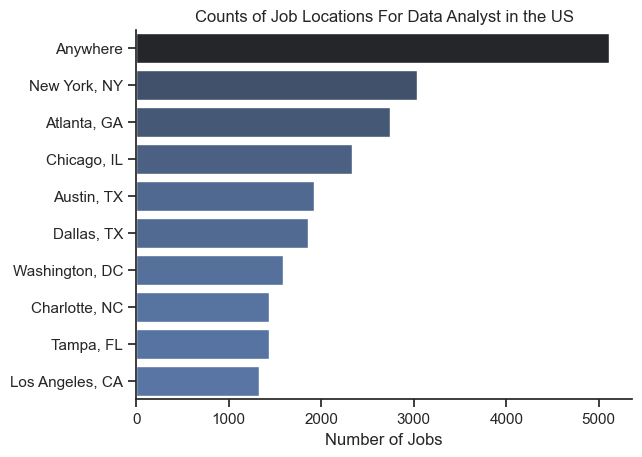

In [5]:
import seaborn as sns

sns.set_theme(style= "ticks")

sns.barplot(data=df_plot,x = "count",y ="job_location",hue= "count",palette="dark:b_r",legend=False)

sns.despine()
plt.title("Counts of Job Locations For Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

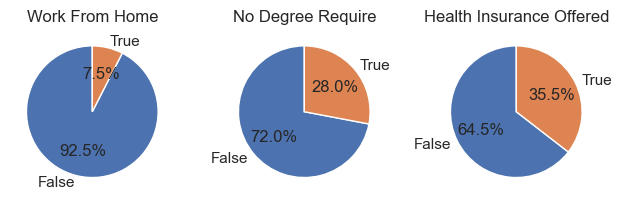

In [6]:
fig,ax = plt.subplots(1,3)

dict_column = {
    "job_work_from_home" :"Work From Home",
    "job_no_degree_mention":"No Degree Require",
    "job_health_insurance" :"Health Insurance Offered"
}

for i,pair in enumerate(dict_column.items()):

    ax[i].pie(df_da_US[pair[0]].value_counts(),startangle= 90,autopct ="%1.1f%%",labels= ["False","True"])
    ax[i].set_title(pair[1])
  

fig.tight_layout()
plt.show()

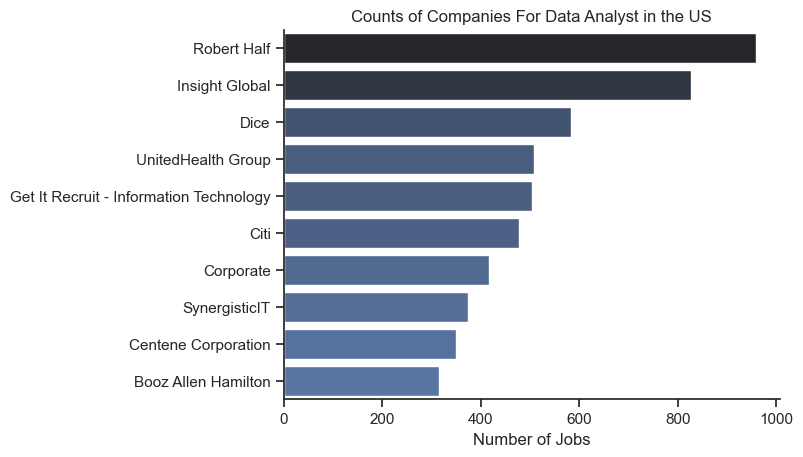

In [7]:
df_plot = df_da_US["company_name"].value_counts().head(10).to_frame()


sns.set_theme(style= "ticks")

sns.barplot(data=df_plot,x = "count",y ="company_name",hue= "count",palette="dark:b_r",legend= False)

sns.despine()
plt.title("Counts of Companies For Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

In [8]:
df_ds_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()


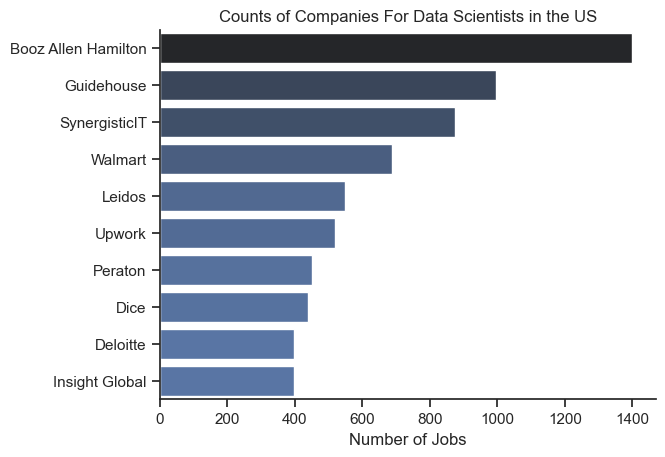

In [9]:
df_ds_plot = df_ds_US["company_name"].value_counts().head(10).to_frame()


sns.set_theme(style= "ticks")

sns.barplot(data=df_ds_plot,x = "count",y ="company_name",hue= "count",palette="dark:b_r",legend= False)

sns.despine()
plt.title("Counts of Companies For Data Scientists in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

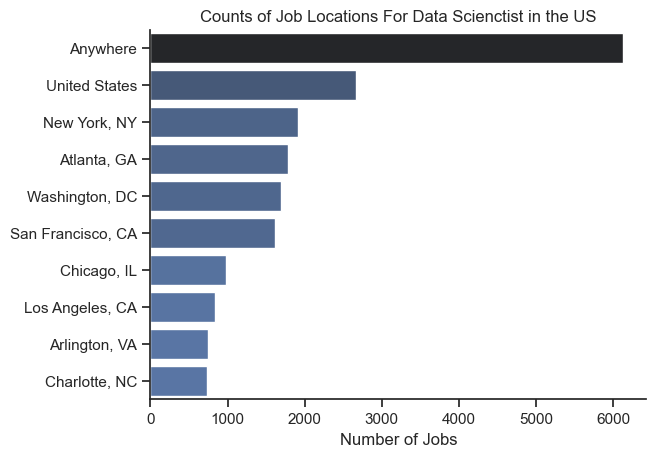

In [10]:
df_ds_plot = df_ds_US["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style= "ticks")

sns.barplot(data=df_ds_plot,x = "count",y ="job_location",hue= "count",palette="dark:b_r",legend=False)

sns.despine()
plt.title("Counts of Job Locations For Data Scienctist in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

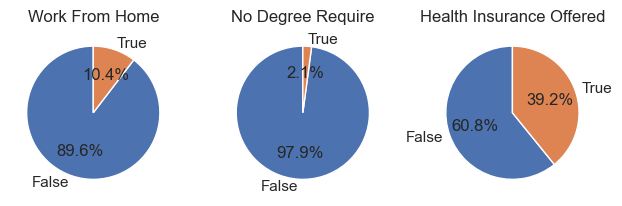

In [11]:
fig,ax = plt.subplots(1,3)

dict_column = {
    "job_work_from_home" :"Work From Home",
    "job_no_degree_mention":"No Degree Require",
    "job_health_insurance" :"Health Insurance Offered"
}

for i,pair in enumerate(dict_column.items()):

    ax[i].pie(df_ds_US[pair[0]].value_counts(),startangle= 90,autopct ="%1.1f%%",labels= ["False","True"])
    ax[i].set_title(pair[1])
  

fig.tight_layout()
plt.show()

In [12]:
df_ds_US[(df_ds_US["job_schedule_type"]=="Internship") & (df_ds_US["job_work_from_home"])]


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
24985,Data Scientist,Data Science intern 30 May - 30 August 23,Anywhere,via LinkedIn,Internship,True,"Texas, United States",2023-05-06 13:03:34,False,False,United States,None,NaN,NaN,Data Glacier,"[sql, seaborn, matplotlib]","{'libraries': ['seaborn', 'matplotlib'], 'prog..."
26071,Data Scientist,Data Scientist Intern,Anywhere,via DiversityJobs,Internship,True,"Illinois, United States",2023-02-24 13:04:15,False,True,United States,None,NaN,NaN,Viasat,[tableau],{'analyst_tools': ['tableau']}
38208,Data Scientist,"Data Science Intern, Analytics",Anywhere,via LinkedIn,Internship,True,"California, United States",2023-12-26 13:02:07,False,True,United States,None,NaN,NaN,Discord,"[sql, python, r]","{'programming': ['sql', 'python', 'r']}"
56745,Data Scientist,Summer Associate Internship (Real Estate Analy...,Anywhere,via Jobgether,Internship,True,"California, United States",2023-09-20 06:02:46,False,False,United States,None,NaN,NaN,Get It Recruit- Real Estate,"[python, r, sql, databricks, azure, pyspark, t...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
73666,Data Scientist,"Summer Internship, Data Science Intern (US)",Anywhere,via LinkedIn,Internship,True,"Texas, United States",2023-01-25 00:05:44,False,False,United States,None,NaN,NaN,Spotify,"[sql, python, r]","{'programming': ['sql', 'python', 'r']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744118,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,"Illinois, United States",2023-04-26 20:07:37,False,False,United States,None,NaN,NaN,GHX,"[sql, r, python, matlab, julia]","{'programming': ['sql', 'r', 'python', 'matlab..."
746013,Data Scientist,Intern Data Scientist,Anywhere,via LinkedIn,Internship,True,"Illinois, United States",2023-03-28 20:08:52,False,False,United States,None,NaN,NaN,Volkswagen Group of America,"[confluence, jira]","{'async': ['confluence', 'jira']}"
748270,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,"New York, United States",2023-01-04 20:03:45,False,False,United States,None,NaN,NaN,Toast,"[python, sql, r, spark, scikit-learn, tensorflow]","{'libraries': ['spark', 'scikit-learn', 'tenso..."
749426,Data Scientist,"Data Scientist, Marketing Intern",Anywhere,via Indeed,Internship,True,"Illinois, United States",2023-03-19 20:26:05,False,False,United States,hour,NaN,30.0,"Gametime United, Inc.","[python, r]","{'programming': ['python', 'r']}"
